# ---Importing libraries---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import datetime
import warnings
warnings.filterwarnings('ignore')

from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import sklearn as sklearn

# ---Reading Datasets---

In [2]:
train=pd.read_csv('train.csv')
clm=['Total_booking']
train_labels=pd.read_csv('train_label.csv',names=clm)

In [3]:
test = pd.read_csv('test.csv')
test['datetime']=test['datetime'].apply(lambda x:datetime.datetime.strptime(x,'%m/%d/%Y %H:%M'))

# ---Adding target column--- 

In [4]:
train=pd.concat([train, train_labels], axis = 1)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


# ---Changing type of date column---

In [5]:
#We cannot work with 'Datetime' column in string format. So, changing the datetime column into datetime format will solve the problem
train['datetime']=train['datetime'].apply(lambda x:datetime.datetime.strptime(x,'%m/%d/%Y %H:%M'))
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [6]:
# raw_data set is the pre-processed data.Using raw_data set for running models. 
raw_data=train.copy()
raw_data.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5


# ---Checking datatypes and unique values of columns---

In [5]:
train.dtypes

datetime         datetime64[ns]
season                   object
holiday                   int64
workingday                int64
weather                  object
temp                    float64
atemp                   float64
humidity                  int64
windspeed               float64
Total_booking             int64
dtype: object

In [6]:
#Unique Values
columns=train.columns
for clm in columns:
    u=train[clm].unique()
    print(clm+':')
    print(u)
    print('-----------------------------------------------------')

datetime:
['2012-05-02T19:00:00.000000000' '2012-09-05T04:00:00.000000000'
 '2011-01-13T09:00:00.000000000' ... '2011-04-12T03:00:00.000000000'
 '2012-11-07T01:00:00.000000000' '2011-01-10T10:00:00.000000000']
-----------------------------------------------------
season:
['Summer' 'Fall' 'Spring' 'Winter']
-----------------------------------------------------
holiday:
[0 1]
-----------------------------------------------------
workingday:
[1 0]
-----------------------------------------------------
weather:
[' Clear + Few clouds' ' Light Snow, Light Rain' ' Mist + Cloudy '
 ' Heavy Rain + Thunderstorm ']
-----------------------------------------------------
temp:
[22.14 28.7   5.74 13.94 30.34 33.62 24.6  21.32 27.06 12.3  18.04 18.86
 25.42 13.12 22.96 26.24 17.22 27.88 36.9  29.52 31.16 10.66 31.98 15.58
  6.56 19.68 16.4  14.76  9.02 32.8  11.48 20.5   9.84  8.2   7.38 23.78
 35.26 37.72  3.28  4.1  36.08  1.64  4.92 34.44  0.82  2.46 38.54 39.36
 41.  ]
-----------------------------

# ---Missing value analysis---

In [7]:
pd.isnull(train).any()

#If You observe the output and the Graph below, there are no null values in the dataset.

datetime         False
season           False
holiday          False
workingday       False
weather          False
temp             False
atemp            False
humidity         False
windspeed        False
Total_booking    False
dtype: bool

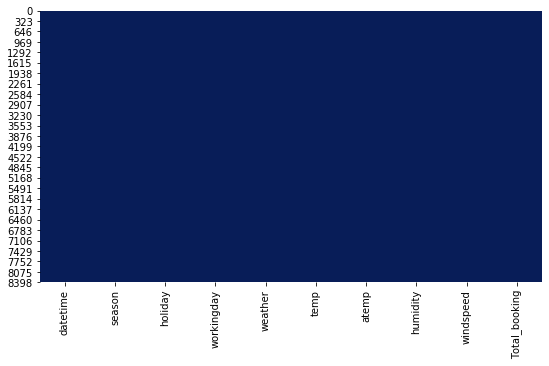

In [10]:
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(train.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

### We can observe from above information and graph that there are no missing values. 

# ---Understanding Data---

In [11]:
train.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,0.028480,0.680294,20.243020,23.655552,61.649173,12.843891,193.007005
std,0.166348,0.466389,7.813494,8.501107,19.199578,8.190314,181.552211
min,0.000000,0.000000,0.820000,0.760000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,16.665000,46.000000,7.001500,43.000000
50%,0.000000,1.000000,20.500000,24.240000,61.000000,12.998000,148.000000
75%,0.000000,1.000000,26.240000,31.060000,77.000000,16.997900,286.000000
max,1.000000,1.000000,41.000000,45.455000,100.000000,56.996900,977.000000


#### Things observed:
        * No missing values
        * Outliers in many columns

# ---Visualizing DateTime column---

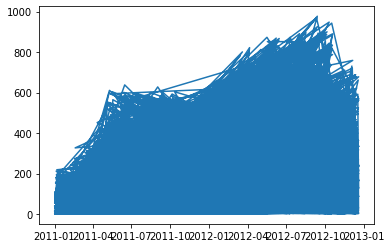

In [12]:
plt.plot(train['datetime'], train['Total_booking'])
plt.show()

### Since no insights can be drwn from the above graph.Formatting DateTime column is necessary

# ---Formatting DateTime column---

In [8]:
'''Converting Datetime column into three new columns - ['time','year','month'].'''

train['time']=train['datetime'].apply(lambda x:str(x).split()[1])

train['time']=train['time'].apply(lambda x:x[:2])

train['time']=train['time'].apply(lambda x:int(x))

train['year']=train['datetime'].apply(lambda x:str(x).split()[0])

train['year']=train['year'].apply(lambda x:x[:4])

train['year']=train['year'].apply(lambda x:int(x))

train['month']=train['datetime'].apply(lambda x:str(x).split()[0])

train['month']=train['month'].apply(lambda x:x[5:7])

train['month']=train['month'].apply(lambda x:int(x))

train.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,time,year,month
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,19,2012,5
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,4,2012,9


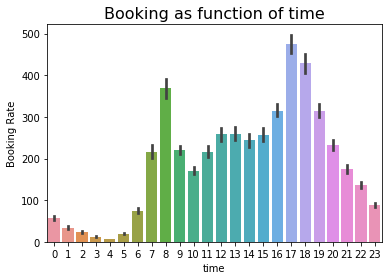

,time,Total_booking
17,17,474.742466
18,18,428.382514
8,8,369.526012
16,16,315.207547
19,19,314.095109


In [14]:
sns.barplot(x='time', y='Total_booking', data=train)
plt.ylabel("Booking Rate")
plt.title("Booking as function of time", fontsize=16)
plt.show()

train[["time", "Total_booking"]].groupby(['time'], as_index=False).mean().sort_values(by='Total_booking', ascending=False).head()

### The number of bookings are high during peak hours

# ---Correlation Analysis--- 

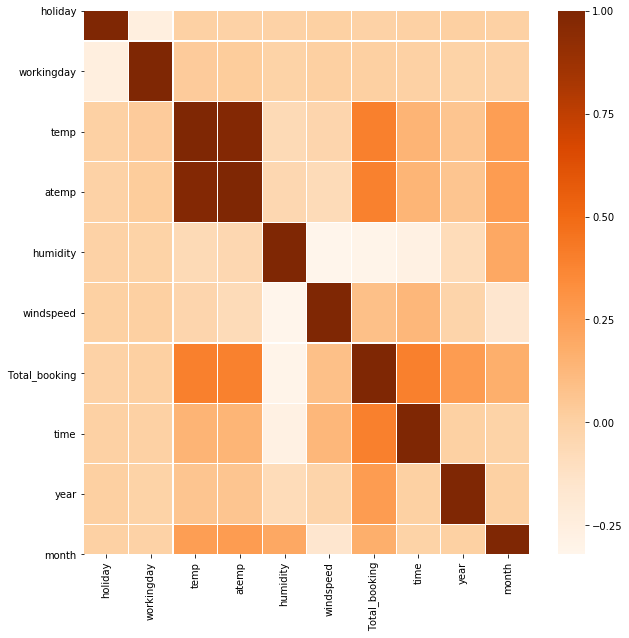

In [15]:
corrmat = train.corr() 
plt.figure(figsize=(10,10))
corr_graph = sns.heatmap(corrmat, cmap ="Oranges", linewidths = 0.2); 
#plt.setp(corr_graph.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)
corr_graph

### From the above graph, 'temp' and 'atemp' are highly correlated. We need to drop either of the columns

# ---Feature Engineering---

### As 'DateTime' column cannot be used, so added 'time','month' and 'year' columns

In [16]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'Total_booking', 'time', 'year',
       'month'],
      dtype='object')

# ---Splitting X and Y columns---

## --Creating dummy columns for categorical variables--

In [9]:
train=pd.get_dummies(train)
train.head(2)

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking,time,year,month,season_Fall,season_Spring,season_Summer,season_Winter,weather_ Clear + Few clouds,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,2012-05-02 19:00:00,0,1,22.14,25.760,77,16.9979,504,19,2012,5,0,0,1,0,1,0,0,0
1,2012-09-05 04:00:00,0,1,28.70,33.335,79,19.0012,5,4,2012,9,1,0,0,0,1,0,0,0


In [10]:
x=train.drop(['datetime','Total_booking','atemp'],axis=1)
y=train['Total_booking']

# ---Linear Regression---

In [11]:
linReg = LinearRegression()
kfold = model_selection.KFold(n_splits=10, random_state=7)
cv_results = model_selection.cross_val_score(linReg, x, y, cv=kfold, scoring='r2')
print(cv_results.mean())

0.39196657479298364


# -- L1 and L2---

In [12]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
lin = LinearRegression()
kfold = model_selection.KFold(n_splits=10, random_state=7)
cv_results = model_selection.cross_val_score(linReg, x, y, cv=kfold, scoring='r2')
print(cv_results.mean())

las = Lasso(alpha=1)
kfold = model_selection.KFold(n_splits=10, random_state=7)
cv_results = model_selection.cross_val_score(las, x, y, cv=kfold, scoring='r2')
print(cv_results.mean())

rid = Ridge(alpha=1)
kfold = model_selection.KFold(n_splits=10, random_state=7)
cv_results = model_selection.cross_val_score(rid, x, y, cv=kfold, scoring='r2')
print(cv_results.mean())

0.39196657479298364
0.3913967632831687
0.3919688602438741


# ---Feature Selection---

In [20]:
train.columns

Index(['datetime', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'Total_booking', 'time', 'year', 'month', 'season_Fall',
       'season_Spring', 'season_Summer', 'season_Winter',
       'weather_ Clear + Few clouds', 'weather_ Heavy Rain + Thunderstorm ',
       'weather_ Light Snow, Light Rain', 'weather_ Mist + Cloudy '],
      dtype='object')

[6.58467067e-03 1.64183810e-02 1.97302697e-01 2.12872002e-01
 2.07657445e-01 2.26114278e-01 1.47814678e-02 6.98424476e-02
 5.38672785e-03 1.67503645e-03 5.28134392e-03 4.84159321e-03
 1.24524489e-02 6.98634476e-05 6.12270183e-03 1.25968952e-02]


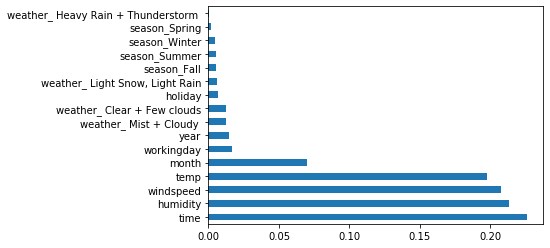

In [21]:
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(22).plot(kind='barh')
plt.show()

### We can drop 'weather_ Heavy Rain + Thunderstorm ' as it doesn't have any importance

In [22]:
x=train.drop(['datetime','Total_booking','atemp','weather_ Heavy Rain + Thunderstorm '],axis=1)
y=train['Total_booking']

# Linear Regression

linReg = LinearRegression()
kfold = model_selection.KFold(n_splits=10, random_state=7)
cv_results = model_selection.cross_val_score(linReg, x, y, cv=kfold, scoring='r2')
print(cv_results.mean())

0.39196657479298364


# ---Ensemble Learning---

### Running different Regression models which use Ensemble Learning

In [23]:
#Modifying Test Dateset
test1 = test.copy()

test1['time']=test1['datetime'].apply(lambda x:str(x).split()[1])
test1['time']=test1['time'].apply(lambda x:x[:2])
test1['time']=test1['time'].apply(lambda x:int(x))
test1['year']=test1['datetime'].apply(lambda x:str(x).split()[0])
test1['year']=test1['year'].apply(lambda x:x[:4])
test1['year']=test1['year'].apply(lambda x:int(x))
test1['month']=test1['datetime'].apply(lambda x:str(x).split()[0])
test1['month']=test1['month'].apply(lambda x:x[5:7])
test1['month']=test1['month'].apply(lambda x:int(x))

test1 = pd.get_dummies(test1)

test1.columns

Index(['datetime', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'time', 'year', 'month', 'season_Fall', 'season_Spring',
       'season_Summer', 'season_Winter', 'weather_ Clear + Few clouds',
       'weather_ Light Snow, Light Rain', 'weather_ Mist + Cloudy '],
      dtype='object')

In [24]:
X_test = test1.drop(['datetime','atemp'],axis=1)
y_test = pd.read_csv('test_label.csv',header=None)

In [25]:
from sklearn.ensemble import GradientBoostingRegressor
model= GradientBoostingRegressor(random_state=1)
model.fit(x, y)
score=model.score(x, y)
print("r2:",score)

predictions_train=model.predict(x)
predictions_train=pd.DataFrame(predictions_train)
predictions_train.head()

rmse_train=np.sqrt(mean_squared_error(y, predictions_train))
#print(rmse_train)

predictions_test=model.predict(X_test)
predictions_test=pd.DataFrame(predictions_test)
predictions_test.head()

rmse_test=np.sqrt(mean_squared_error(y_test, predictions_test))
#print(rmse_test)

print('rmse_train: ',rmse_train)
print('rmse_test: ',rmse_test)

r2: 0.865398577404457
rmse_train:  66.6041713094881
rmse_test:  68.32713811804177


In [26]:
import xgboost as xgb
model=xgb.XGBRegressor(random_state=1)
model.fit(x, y)
score=model.score(x, y)
print("r2:",score)

predictions_train=model.predict(x)
predictions_train=pd.DataFrame(predictions_train)
predictions_train.head()

rmse_train=np.sqrt(mean_squared_error(y, predictions_train))
#print(rmse_train)

predictions_test=model.predict(X_test)
predictions_test=pd.DataFrame(predictions_test)
predictions_test.head()

rmse_test=np.sqrt(mean_squared_error(y_test, predictions_test))
#print(rmse_test)

print('rmse_train: ',rmse_train)
print('rmse_test: ',rmse_test)

[23:28:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2: 0.8611497738804004
rmse_train:  67.6472116103476
rmse_test:  70.14894348187643


In [27]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(random_state=1)
model.fit(x, y)
score=model.score(x, y)
print("r2: ",score)

predictions_train=model.predict(x)
predictions_train=pd.DataFrame(predictions_train)

rmse_train=np.sqrt(mean_squared_error(y, predictions_train))

predictions_test=model.predict(X_test)
predictions_test=pd.DataFrame(predictions_test)


#print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
rmse_test=np.sqrt(mean_squared_error(y_test, predictions_test))

print('rmse_train: ',rmse_train)
print('rmse_test: ',rmse_test)

r2:  0.9880679498962316
rmse_train:  19.83052163692674
rmse_test:  45.64633638103066


### Gradient Boosting, XG Boosting and RandomForest Results
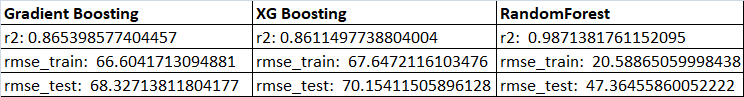

### From the above table we can conclude that Random Forest Regressor is overfitting the data. Hence final model is "Gradient Boosting Model"

#  ---Outlier Analysis---

In [28]:
def find_outliers(data,column_name):
    # Set upper and lower limit to 3 standard deviation
    data_std = data[column_name].std()
    data_mean = np.mean(data[column_name])
    outliers_cut_off = data_std * 3
    
    lower_limit  = data_mean - outliers_cut_off 
    upper_limit = data_mean + outliers_cut_off
    print(column_name)
    print(lower_limit)
    print(upper_limit)
    
    # Generate outliers
    outliers=[]
    index_outliers=[]
    for outlier in data[column_name]:
        if outlier > upper_limit or outlier < lower_limit:
            outliers.append(outlier)
    
    print(outliers)
    print('----------------------------------------')

column=['temp','atemp', 'humidity','windspeed']
for clm in column:
    find_outliers(train,clm)

temp
-3.1974618482995787
43.68350227089954
[]
----------------------------------------
atemp
-1.8477677762246145
49.15887135913707
[]
----------------------------------------
humidity
4.050440630479663
119.24790571770592
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
----------------------------------------
windspeed
-11.727051454817166
37.41483298903901
[47.9988, 39.0007, 43.9989, 39.0007, 43.9989, 39.0007, 39.0007, 43.9989, 39.0007, 43.0006, 39.0007, 39.0007, 43.0006, 39.0007, 43.0006, 39.0007, 39.0007, 39.0007, 39.0007, 43.9989, 56.9969, 39.0007, 40.9973, 46.0022, 51.9987, 40.9973, 39.0007, 43.9989, 47.9988, 39.0007, 39.0007, 39.0007, 39.0007, 39.0007, 43.0006, 43.0006, 43.9989, 46.0022, 40.9973, 40.9973, 43.9989, 39.0007, 50.0021, 39.0007, 40.9973, 46.0022, 39.0007, 43.0006]
----------------------------------------


In [29]:
#If you observe the above output 'Windspeed' has Outliers. So, Removing outliers will increase the accuracy of the model.
windspeed_mean=np.mean(train['windspeed'])
windspeed_std = train['windspeed'].std()
outliers_cut_off=windspeed_std * 3
lower_limit  = windspeed_mean - outliers_cut_off 
upper_limit = windspeed_mean + outliers_cut_off

train['windspeed'] = train['windspeed'].apply(lambda x : windspeed_mean if x >= upper_limit or x < lower_limit else x )

In [30]:
x=train.drop(['datetime','Total_booking','atemp','weather_ Heavy Rain + Thunderstorm '],axis=1)
y=train['Total_booking']

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
model= GradientBoostingRegressor(random_state=1 , n_estimators = 250 , learning_rate = 0.1 )
model.fit(x, y)
score=model.score(x, y)
print("r2:",score)

predictions_train=model.predict(x)
predictions_train=pd.DataFrame(predictions_train)
predictions_train.head()

rmse_train=np.sqrt(mean_squared_error(y, predictions_train))
#print(rmse_train)

predictions_test=model.predict(X_test)
predictions_test=pd.DataFrame(predictions_test)
predictions_test.head()

rmse_test=np.sqrt(mean_squared_error(y_test, predictions_test))
#print(rmse_test)

print('rmse_train: ',rmse_train)
print('rmse_test: ',rmse_test)

r2: 0.9171454692501145
rmse_train:  52.25582819519139
rmse_test:  53.924564710227266


In [32]:
estimators = np.arange(200,2000,25)

In [33]:
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'random_state':[1]}
search=GridSearchCV(estimator=model,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1)

In [34]:
search.fit(x,y)
search.best_params_

{'learning_rate': 0.1, 'n_estimators': 2000, 'random_state': 1}

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
model= GradientBoostingRegressor(random_state=1 , n_estimators = 2000 , learning_rate = 0.1 )
model.fit(x, y)
score=model.score(x, y)
print("r2:",score)

predictions_train=model.predict(x)
predictions_train=pd.DataFrame(predictions_train)
predictions_train.head()

rmse_train=np.sqrt(mean_squared_error(y, predictions_train))
#print(rmse_train)

predictions_test=model.predict(X_test)
predictions_test=pd.DataFrame(predictions_test)
predictions_test.head()

rmse_test=np.sqrt(mean_squared_error(y_test, predictions_test))
#print(rmse_test)

print('rmse_train: ',rmse_train)
print('rmse_test: ',rmse_test)

r2: 0.9572648529871944
rmse_train:  37.52919123581203
rmse_test:  46.3788228185838


# Conclusion


* After Visualing the Dataset , it was found that 'datetime' column has no use in training the model. But 'time of the day',
  'Month','Year' individually made much differnce in training the model.
* Columns - ['temp','atemp'] are highly correlated. Since these are independent variables, removed 'temp' column.
* From all the models, GradientBoostingRegressor is found to be the best with 95% 'r2 score' and relatively low difference in 
  training and test MSE rates.
* Although 'r2 score' is high for RandomForestRegressor, it overfits the model as there is high difference between Train and
  Test MSE.
* Hyperparameter tuning for GradientBoostingRegressor has been done using GridSearchCv with n_estimators ranging from [200,2000] and learning rate ranging from [.001,0.01,.1] and with a random_state of 1.
* Best Hyperparamters for the model are found to be n_estimators = 2000 , learning_rate = 0.1 , random_state = 1.